<a href="https://colab.research.google.com/github/Tessellate-Imaging/Monk_Object_Detection/blob/master/example_notebooks/15_pytorch_peleenet/Train%20With%20Validation%20Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Installation

 - Run these commands
     
     - git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git
     
     - cd Monk_Object_Detection/15_pytorch_peleenet/installation
     
 - Select the right file and run
 
     - chmod +x install.sh && ./install.sh

In [ ]:
! git clone https://github.com/Tessellate-Imaging/Monk_Object_Detection.git

In [ ]:
! chmod +x install.sh && ./install.sh

## Dataset required - in Pascal VOC format

    parent_dir
        |
        |---------train
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)
        |
        |---------validation
                    |
                    |--------images
                                |
                                |--------img1.jpg
                                |--------img2.jpg
                                |--------....(And so on)
                    |
                    |---------annotations
                                |
                                |--------img1.xml
                                |--------img2.xml
                                |--------....(And so on)

# Training

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/15_pytorch_peleenet/lib")

In [2]:
from train_engine import Detector

In [3]:
gtf = Detector();

In [4]:
train_img_dir = "ship/images/Train";
train_label_dir = "ship/voc/";
label_file = "ship/classes.txt";


gtf.Train_Dataset(train_img_dir, train_label_dir, label_file);

# Validation dataset support yet to be added

In [5]:
gtf.Dataset_Params(batch_size=16, num_workers=3)

In [6]:
gtf.Model_Params(gpu_devices=[0]);

In [7]:
gtf.Hyper_Params(lr=0.01, gamma=0.1, momentum=0.9, weight_decay=0.0005)

In [8]:
gtf.Training_Params(num_epochs=50, model_output_dir="output")

In [9]:
gtf.Train();

===> Loading Dataset...
===> Done...
===> Setting up epoch details...
===> Done...
===> Training STDN
Time:Sat Aug 22 09:12:11 2020||Epoch:1||EpochIter:0/46||Iter:0||Loss_L:3.5618||Loss_C:8.2471||Batch_Time:1.2812||LR:0.0100000
Time:Sat Aug 22 09:12:37 2020||Epoch:2||EpochIter:4/46||Iter:50||Loss_L:3.4293||Loss_C:2.9847||Batch_Time:0.1183||LR:0.0100000
Time:Sat Aug 22 09:13:00 2020||Epoch:3||EpochIter:8/46||Iter:100||Loss_L:3.0753||Loss_C:2.9268||Batch_Time:0.1325||LR:0.0100000
Time:Sat Aug 22 09:13:24 2020||Epoch:4||EpochIter:12/46||Iter:150||Loss_L:2.3405||Loss_C:2.7297||Batch_Time:0.2023||LR:0.0100000
Time:Sat Aug 22 09:13:47 2020||Epoch:5||EpochIter:16/46||Iter:200||Loss_L:2.1358||Loss_C:2.5345||Batch_Time:0.6331||LR:0.0100000
Time:Sat Aug 22 09:14:11 2020||Epoch:6||EpochIter:20/46||Iter:250||Loss_L:2.2034||Loss_C:2.3658||Batch_Time:0.1244||LR:0.0100000
Time:Sat Aug 22 09:14:34 2020||Epoch:7||EpochIter:24/46||Iter:300||Loss_L:2.0373||Loss_C:2.3810||Batch_Time:0.1319||LR:0.0100000
T

# Inference

In [1]:
import os
import sys
sys.path.append("Monk_Object_Detection/15_pytorch_peleenet/lib")

In [2]:
from infer_engine import Infer

In [3]:
gtf = Infer();

In [4]:
gtf.Data_Params("ship/classes.txt")

In [5]:
gtf.Model_Params(model_dir="output", use_gpu=True)

Loading model for inference
Loading resume network...
===> Finished constructing and loading model
Done....
Loading other params
Done....


Inference time 2 - 1.2386062145233154 sec


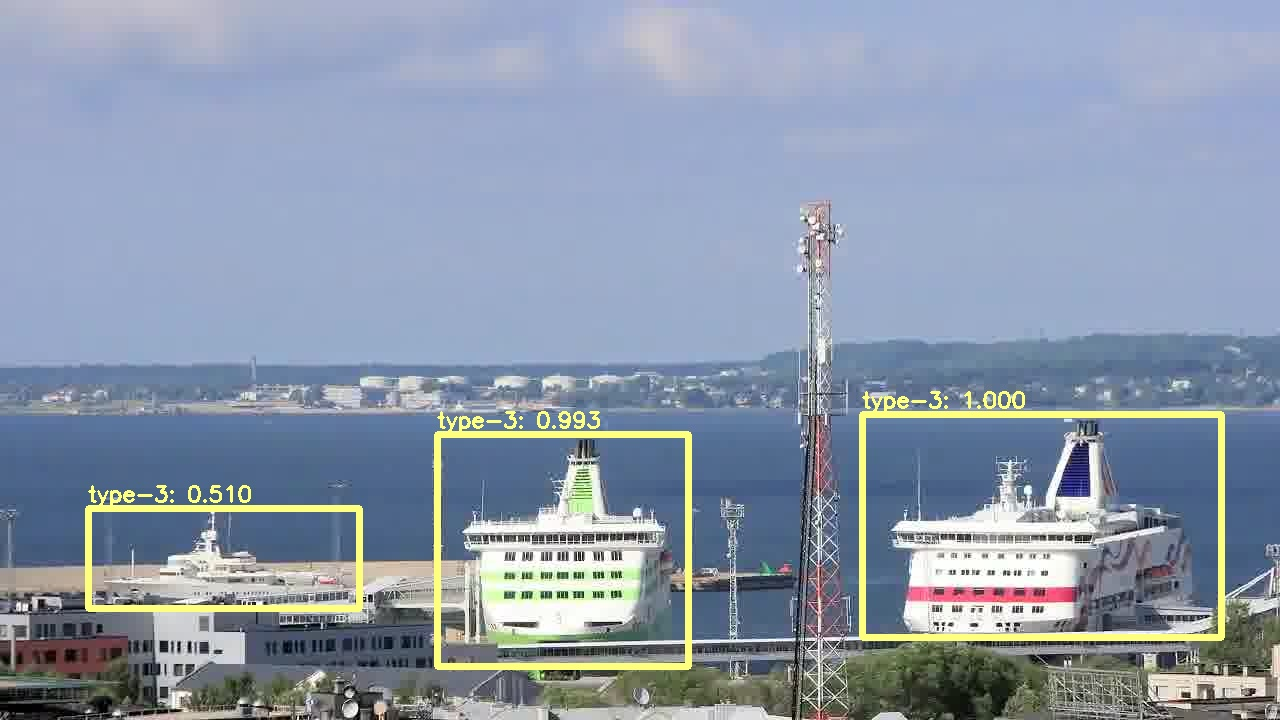

In [6]:
gtf.Predict("ship/test/img1.jpg", thresh=0.5, visualize=False, output_img_path="output.jpg")
from IPython.display import Image
Image(filename='output.jpg') 

Inference time 2 - 0.07725882530212402 sec


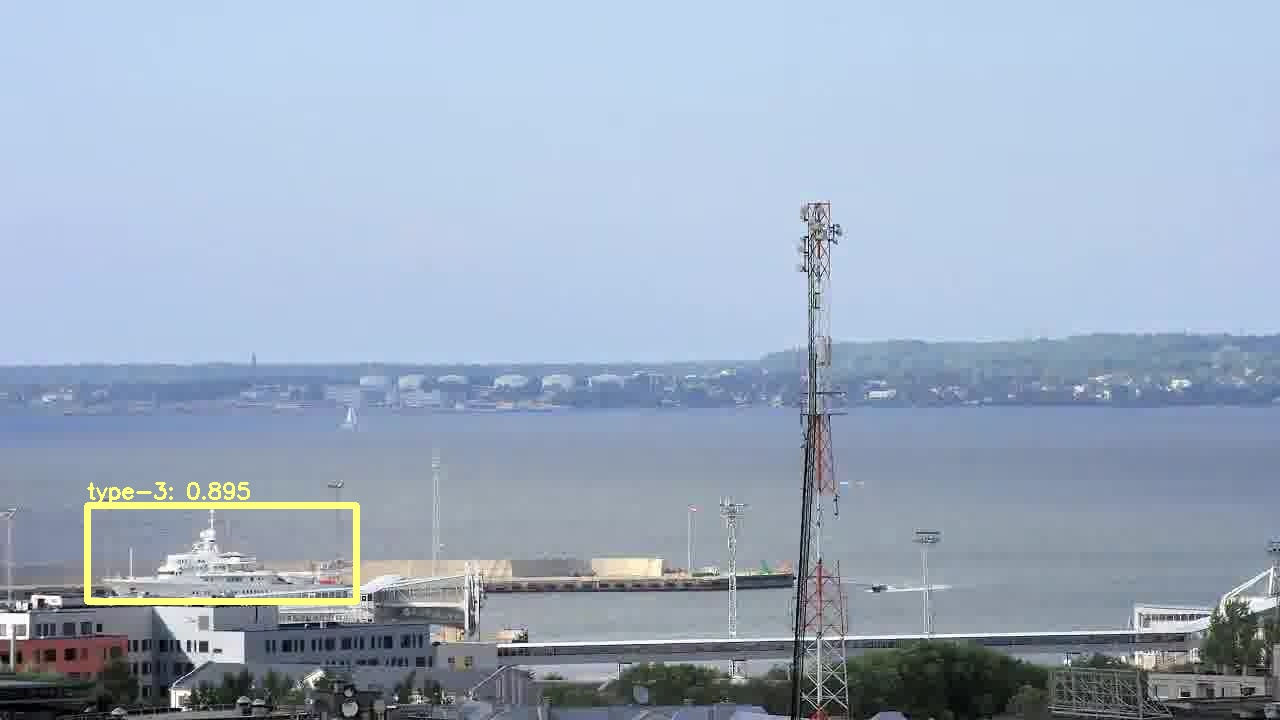

In [7]:
gtf.Predict("ship/test/img5.jpg", thresh=0.5, visualize=False, output_img_path="output.jpg")
from IPython.display import Image
Image(filename='output.jpg') 